# Movies Portfolio Project
***

## Dataset Content

[Link to dataset on Kaggle](https://www.kaggle.com/danielgrijalvas/movies)

There are 6820 movies in the dataset (220 movies per year, 1986-2016). Each movie has the following attributes:

- budget: the budget of a movie. Some movies don't have this, so it appears as NULL

- company: the production company

- country: country of origin

- director: the director

- genre: main genre of the movie.

- gross: revenue of the movie

- name: name of the movie

- rating: rating of the movie (R, PG, etc.)

- released: release date (YYYY-MM-DD)

- runtime: duration of the movie

- score: IMDb user rating

- votes: number of user votes

- star: main actor/actress

- writer: writer of the movie

- year: year of release

In [1]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
# Read in the movies dataset

df = pd.read_csv('movies.csv')
df_raw = pd.read_csv('movies.csv')

## EDA/Cleaning

In [3]:
print(df.shape)
df.head()

(7668, 15)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

<div class="alert alert-block alert-info">
Here we may drop null columns since they won't be useful and are potentially harmful to analysis if replaced with other numbers. Null companies could be considered okay to have but with the amount of total data we are fine to drop those 17 rows.
</div>

In [5]:
# drop rows with unknown values

df = df.dropna(axis=0)

In [6]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [7]:
# change the data types of some columns

df['budget'] = df.budget.astype('int64')
df['gross'] = df.gross.astype('int64')
df['votes'] = df.votes.astype('int64')
df['runtime'] = df.runtime.astype('int64')

In [8]:
# fix the date released format

df['release_date'] = df.apply(lambda x: x['released'][0:x['released'].find(' (')],axis=1)

df['release_date'] = pd.to_datetime(df['release_date'], infer_datetime_format=True)

df.drop('released', axis=1)

df['release_date'].head()

0   1980-06-13
1   1980-07-02
2   1980-06-20
3   1980-07-02
4   1980-07-25
Name: release_date, dtype: datetime64[ns]

In [9]:
# look at highest and lowest grossing movies

df.sort_values(['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009-12-18
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019-04-26
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997-12-19
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015-12-18
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018-04-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96,2015-01-15
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97,1994-06-04
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108,2001-05-11
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85,1982-03-12


## Analysis

<AxesSubplot:>

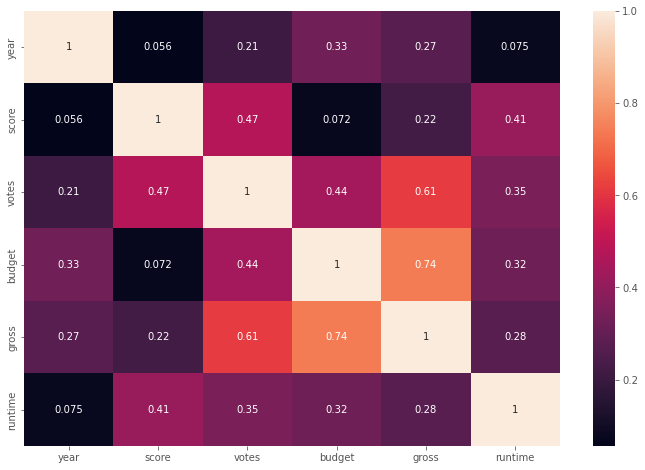

In [10]:
sns.heatmap(df.corr(), annot = True)

<div class="alert alert-block alert-info">
At a glance, we can see that gross is most correlated with votes and budget. It makes sense that spending more can mean a better movie or at least a heavily advertised movie. This advertising along with likely being released by a larger company that can afford larger budgets leads to more reach, which means more viewers and their votes.
</div>

C:\Users\kylec\Documents\Programming\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


Text(50000, 2500000000, 'Rsquared: 0.378')

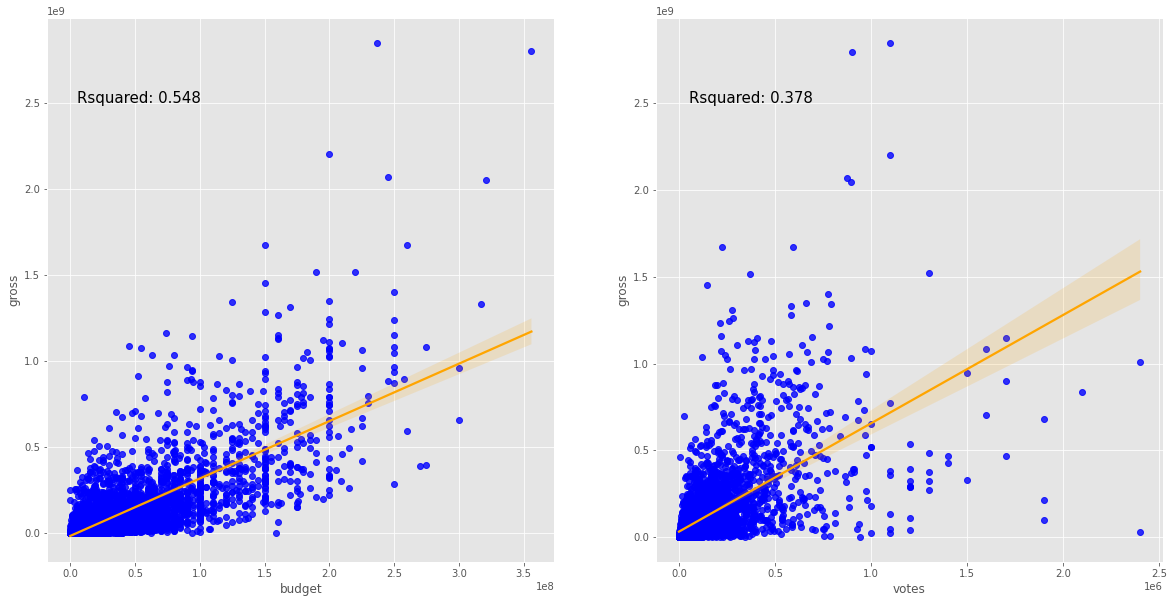

In [11]:
from statsmodels.formula.api import ols

# Create model with budget/votes as a predictor for gross

budget_model = ols('gross ~ budget', data=df).fit(cov_type = 'HC3')
votes_model = ols('gross ~ votes', data=df).fit(cov_type = 'HC3')

# Scatterplot with the linear regression line and R^2 to better visualize correlation.

fig, axs = plt.subplots(ncols=2, figsize=(20,10))

sns.regplot(x = 'budget', y = 'gross', color = 'b',data = df, line_kws = {'color':'orange'}, ax=axs[0])
axs[0].annotate('Rsquared: {}'.format(round(budget_model.rsquared_adj,3)), (5000000, 2500000000), fontsize = 15)

sns.regplot(x = 'votes', y = 'gross', color = 'b',data = df, line_kws = {'color':'orange'}, ax=axs[1])
axs[1].annotate('Rsquared: {}'.format(round(votes_model.rsquared_adj,3)), (50000, 2500000000), fontsize = 15)

In [12]:
df[(df['votes'] > 1500000) & (df['gross'] < 500000000)]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date
2443,The Shawshank Redemption,R,Drama,1994,"October 14, 1994 (United States)",9.3,2400000,Frank Darabont,Stephen King,Tim Robbins,United States,25000000,28817291,Castle Rock Entertainment,142,1994-10-14
2444,Pulp Fiction,R,Crime,1994,"October 14, 1994 (United States)",8.9,1900000,Quentin Tarantino,Quentin Tarantino,John Travolta,United States,8000000,213928762,Miramax,154,1994-10-14
3443,The Matrix,R,Action,1999,"March 31, 1999 (United States)",8.7,1700000,Lana Wachowski,Lilly Wachowski,Keanu Reeves,United States,63000000,466364845,Warner Bros.,136,1999-03-31
3444,Fight Club,R,Drama,1999,"October 15, 1999 (United States)",8.8,1900000,David Fincher,Chuck Palahniuk,Brad Pitt,Germany,63000000,101209702,Fox 2000 Pictures,139,1999-10-15


<div class="alert alert-block alert-info">
Three out of the four movies shown in this outlier check are what I consider to be cult classic movies: Pulp Fiction, The Matrix, and Fight Club. Their votes are high due to many fans over many years as opposed to garnering most of their attention
immediately upon release and then fizzling out. The fourth movie also appears to have little success but since release has been in contention as one of the best movies of all time, still being referenced in new media to this day.
</div>

In [13]:
df[(df['votes'] < 1500000) & (df['gross'] > 2000000000)]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997-12-19
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009-12-18
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015-12-18
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018-04-27
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019-04-26


<div class="alert alert-block alert-info">
Following that same logic helps to think about why these movies have less votes. These are blockbuster movies with highly anticipated releases, but with less staying power. These are also newer movies aside from Titanic and therefore haven't had enough time to catch up.

Star Wars and both Avengers movies are also a part of multi-movie universes and will have trouble in the future as less people have similar investments into watching the previous films.
</div>

In [14]:
df[(df['budget'] > 250000000) & (df['gross'] < 750000000)]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date
4870,Superman Returns,PG-13,Action,2006,"June 28, 2006 (United States)",6.0,274000,Bryan Singer,Michael Dougherty,Brandon Routh,United States,270000000,391081192,Warner Bros.,154,2006-06-28
5658,Tangled,PG,Animation,2010,"November 24, 2010 (United States)",7.7,417000,Nathan Greno,Dan Fogelman,Mandy Moore,United States,260000000,592462816,Walt Disney Animation Studios,100,2010-11-24
7066,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",6.1,418000,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000,657926987,Warner Bros.,120,2017-11-17
7261,Solo: A Star Wars Story,PG-13,Action,2018,"May 25, 2018 (United States)",6.9,306000,Ron Howard,Jonathan Kasdan,Alden Ehrenreich,United States,275000000,392924807,Lucasfilm,135,2018-05-25


In [15]:
df[(df['budget'] > 100000000) & (df['budget'] > (5 * df['gross']))]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date
7465,The Irishman,R,Biography,2019,"November 27, 2019 (United States)",7.8,344000,Martin Scorsese,Steven Zaillian,Robert De Niro,United States,159000000,968853,Tribeca Productions,209,2019-11-27


<div class="alert alert-block alert-info">
Above are some examples of big budget movies that "flopped."
    
It is interesting to note that The Irishman had a limited release and was controlled by Netflix to drive subscribers so their gross does not tell the full story, even though it likely didn't make enough to justify its hefty cost.
</div>

In [16]:
# create category codes to find correlation for non-numeric features

df_numerized = df.copy()


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146,1980-06-13
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104,1980-07-02
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124,1980-06-20
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88,1980-07-02
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98,1980-07-25


<AxesSubplot:>

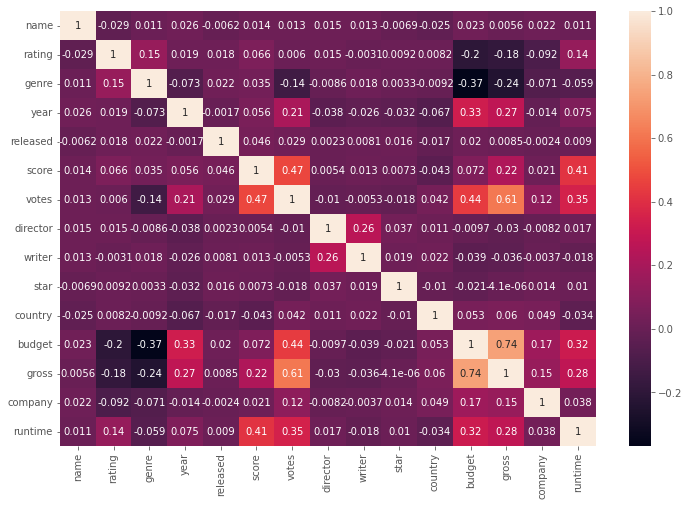

In [17]:
sns.heatmap(df_numerized.corr(), annot = True)

In [18]:
df_numerized.corr().unstack().sort_values(ascending=False)

name     name       1.000000
rating   rating     1.000000
company  company    1.000000
gross    gross      1.000000
budget   budget     1.000000
                      ...   
rating   budget    -0.203946
genre    gross     -0.244101
gross    genre     -0.244101
budget   genre     -0.368523
genre    budget    -0.368523
Length: 225, dtype: float64

<div class="alert alert-block alert-info">
One final look at correlations that include our categorical variables did not reveal any other high correlations. Budget and votes remain the most correlated. Since votes would occur after a movie has been out for an extended period of time, that means budget would be the best predictor of gross revenue based on this dataset. Looking below we see that our p-value is close to 0 and we can reject the null hypothesis that budget has a 0 coefficient in the model.
</div>

In [22]:
print(budget_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     758.3
Date:                Wed, 29 Jun 2022   Prob (F-statistic):          2.41e-156
Time:                        19:05:55   Log-Likelihood:            -1.0880e+05
No. Observations:                5421   AIC:                         2.176e+05
Df Residuals:                    5419   BIC:                         2.176e+05
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.686e+07   3.38e+06     -4.994      0.0